In [21]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"D:\ABHISHEK DIGICROME\Project 4 Nexthikes\Processed_Flipdata - Processed_Flipdata.csv")

In [22]:
# Inspect the first few rows of the data
print(data.head(10))

   Unnamed: 0            Model         Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7    Night Black      64    4      6000   
1           1  Infinix SMART 7     Azure Blue      64    4      6000   
2           2     MOTOROLA G32   Mineral Gray     128    8      5000   
3           3         POCO C50     Royal Blue      32    2      5000   
4           4  Infinix HOT 30i       Marigold     128    8      5000   
5           5  Infinix HOT 30i   Glacier Blue     128    8      5000   
6           6  Infinix HOT 30i   Mirror Black     128    8      5000   
7           7  Infinix HOT 30i  Diamond White     128    8      5000   
8           8  Infinix HOT 30i  Diamond White      64    4      5000   
9           9  Infinix HOT 30i   Mirror Black      64    4      5000   

  Rear Camera Front Camera  AI Lens  Mobile Height  \
0        13MP          5MP        1          16.76   
1        13MP          5MP        1          16.76   
2        50MP         16MP        0          

In [23]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


In [24]:
# Summary statistics
print(data.describe())

       Unnamed: 0      Memory         RAM     Battery_     AI Lens  \
count  541.000000  541.000000  541.000000   541.000000  541.000000   
mean   289.711645  110.550832    5.397412  4871.587800    0.062847   
std    182.359185   60.600694    1.984923   780.148862    0.242911   
min      0.000000   16.000000    2.000000   800.000000    0.000000   
25%    135.000000   64.000000    4.000000  5000.000000    0.000000   
50%    273.000000  128.000000    6.000000  5000.000000    0.000000   
75%    434.000000  128.000000    8.000000  5000.000000    0.000000   
max    642.000000  256.000000    8.000000  7000.000000    1.000000   

       Mobile Height  
count     541.000000  
mean       16.431201  
std         2.523553  
min         4.500000  
25%        16.510000  
50%        16.710000  
75%        16.940000  
max        41.940000  


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [26]:
# Remove duplicate rows based on all columns
data = data.drop_duplicates()

In [27]:
# Check for missing values again
print(data.isnull().sum())

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


In [28]:
# Clean 'Prize' column because it is a obeject type
data['Prize'] = data['Prize'].replace({',': '', '₹': ''}, regex=True)
data['Prize'] = pd.to_numeric(data['Prize'], errors='coerce')

In [29]:
data.shape

(541, 12)

In [30]:
data.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


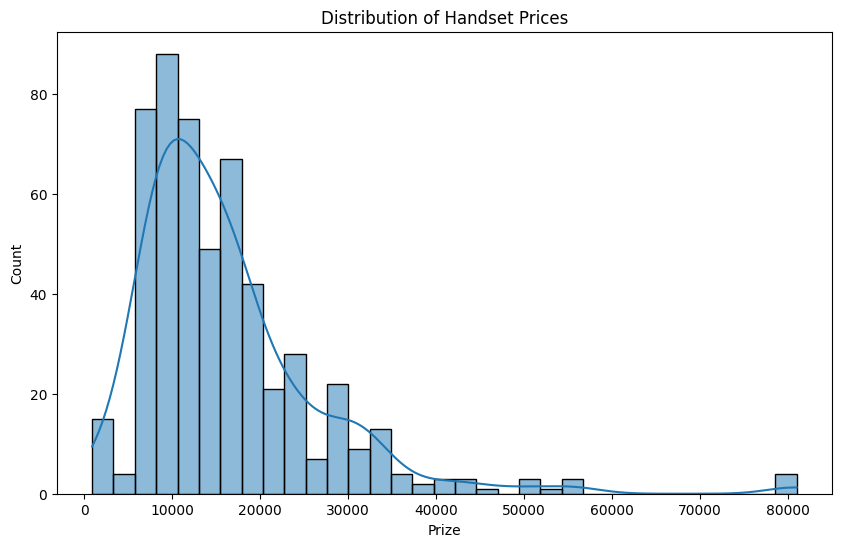

In [31]:
# Visualize the distribution of features
plt.figure(figsize=(10, 6))
sns.histplot(data['Prize'], kde=True)
plt.title("Distribution of Handset Prices")
plt.show()

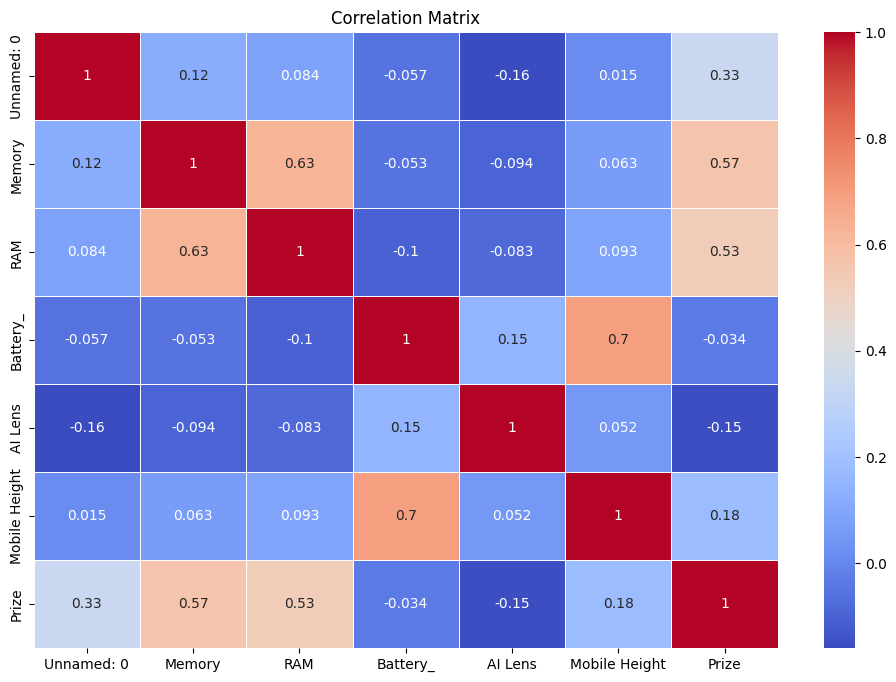

In [32]:
# Visualize correlations between features
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

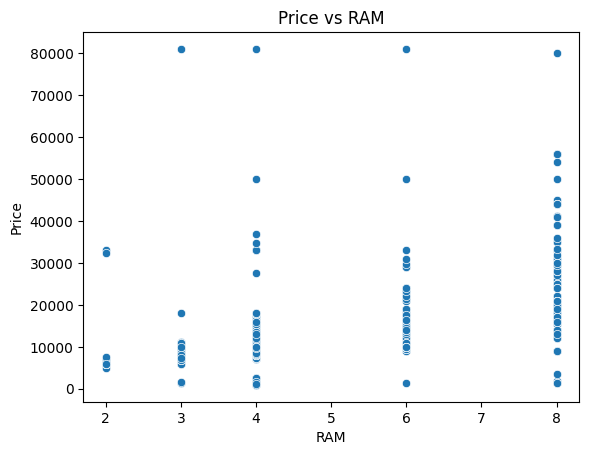

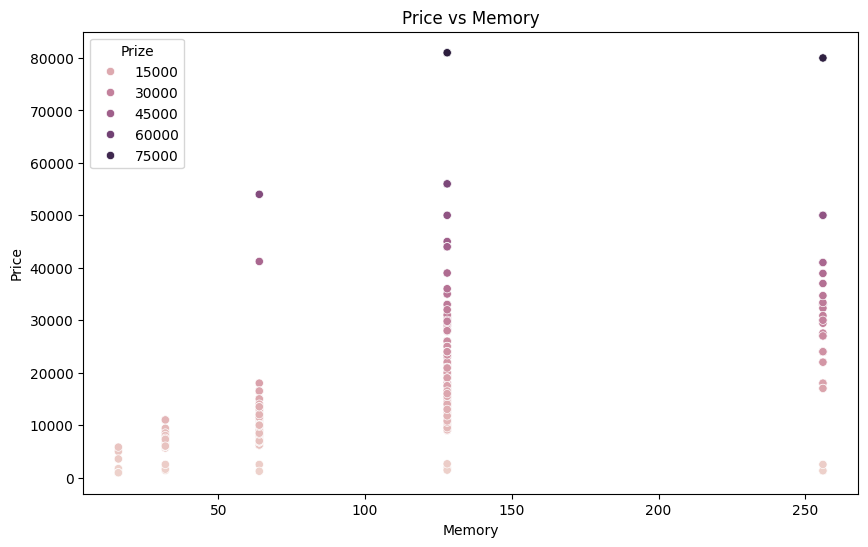

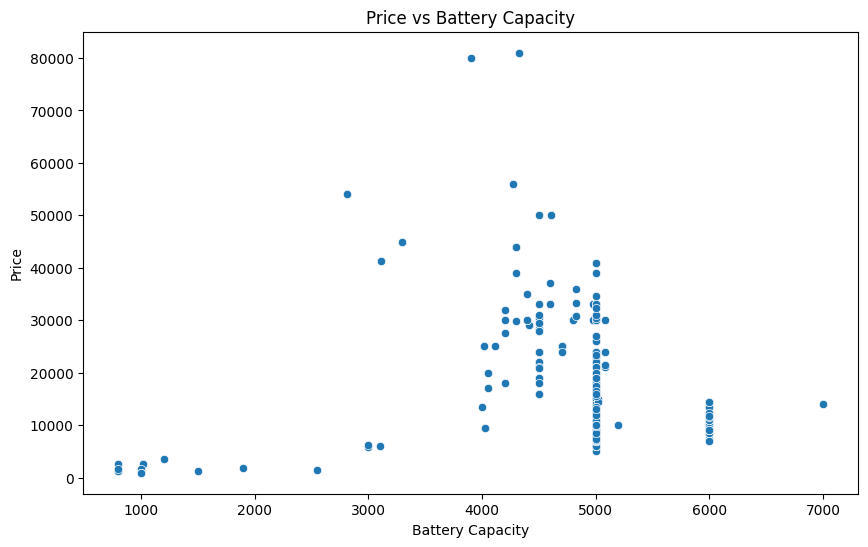

In [33]:
# Scatter plot: RAM vs Price
sns.scatterplot(x=data['RAM'], y=data['Prize'])
plt.title("Price vs RAM")
plt.xlabel('RAM')
plt.ylabel('Price')
plt.show()

# Scatter plot: Memory vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Memory'], y=data['Prize'], hue=data['Prize'])
plt.title("Price vs Memory")
plt.xlabel('Memory')
plt.ylabel('Price')
plt.show()

# Scatter plot: Battery_ vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Battery_'], y=data['Prize'])
plt.title("Price vs Battery Capacity")
plt.xlabel('Battery Capacity')
plt.ylabel('Price')
plt.show()

# To Chek Outlier in all columns

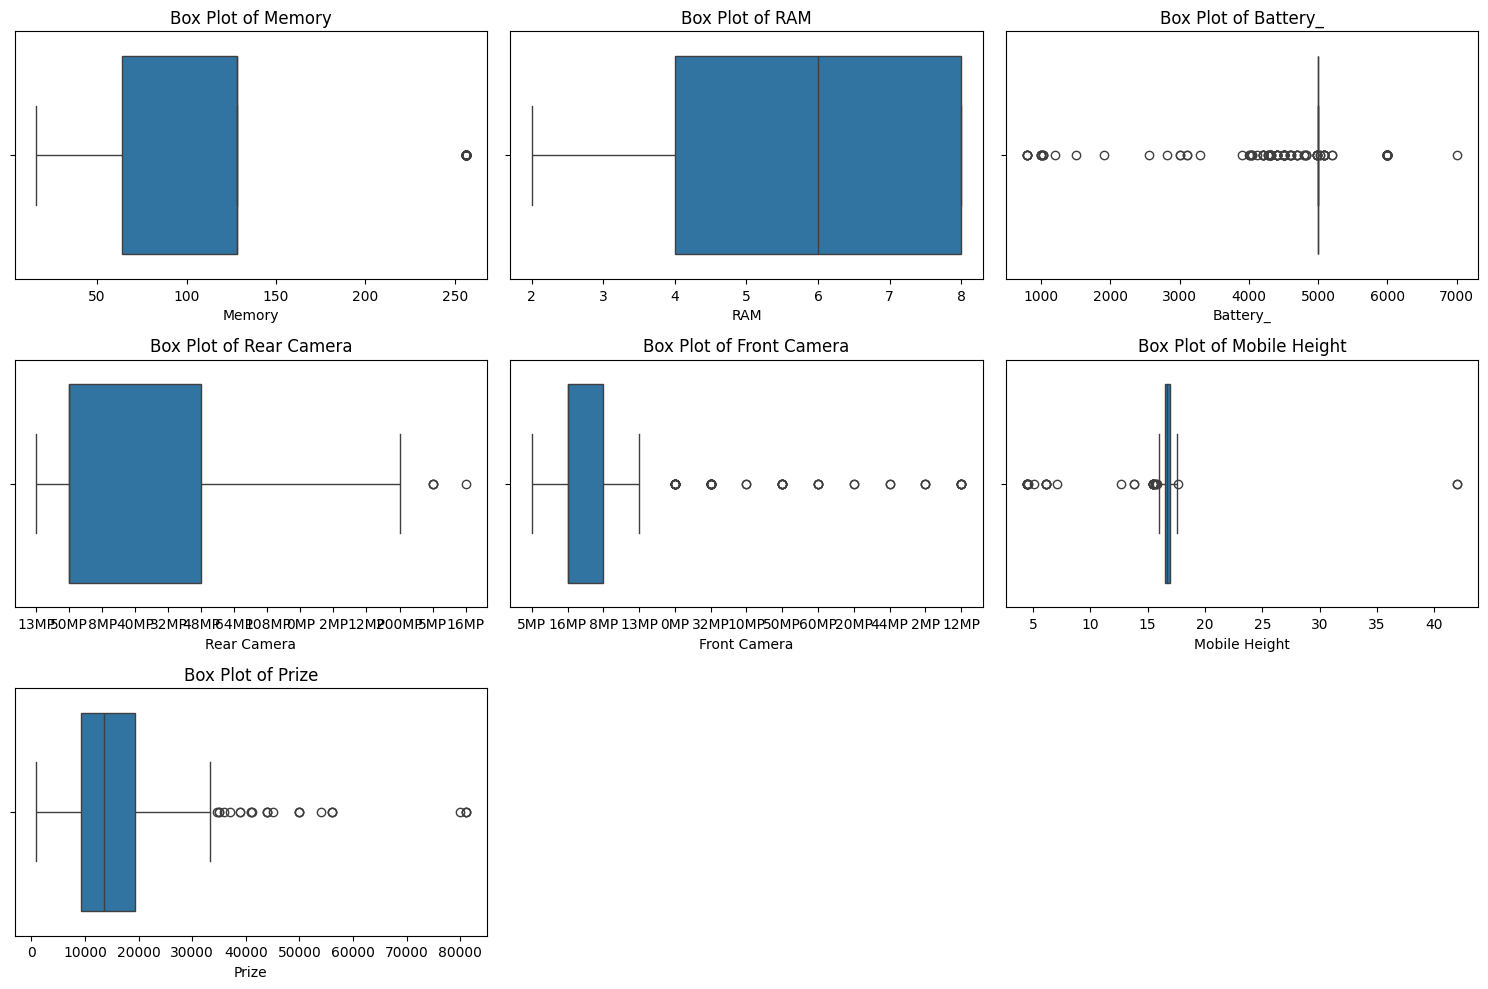

In [34]:
# Columns to plot
columns_to_plot = ['Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera', 'Mobile Height', 'Prize']

# Set up the figure
plt.figure(figsize=(15, 10))

# Box plots for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


# Removing outliers

In [35]:
# By using the z_score method
from scipy import stats
data = data[(np.abs(stats.zscore(data.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]


In [36]:
data.shape

(478, 12)

In [37]:
print(data.columns)

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')


# Data Preprocessing And Model tranning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'data' is your dataframe, and 'Prize' is the target variable
# Separate features (X) and target (y)
X = data.drop(columns=['Prize'])
y = data['Prize']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# Preprocessing for numerical features: Impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Preprocessing for categorical features: Impute missing values and apply one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent category
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine the numerical and categorical transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing transformations to the training and test sets using the pipeline
# Fit and transform the training data, and only transform the test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train a RandomForestRegressor model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_preprocessed, y_train)

# Predict on the test data
y_pred = model_rf.predict(X_test_preprocessed)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 1327.5169791666667
Mean Squared Error: 6420485.509244791
R-squared: 0.8913611528387035


# LinearRegression model

In [39]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train_preprocessed, y_train)

# Predict on the test data
y_pred_lr = model_lr.predict(X_test_preprocessed)

# Evaluate the model performance
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - Mean Absolute Error: {mae_lr}')
print(f'Linear Regression - Mean Squared Error: {mse_lr}')
print(f'Linear Regression - R-squared: {r2_lr}')

Linear Regression - Mean Absolute Error: 1333.3362645447348
Linear Regression - Mean Squared Error: 5169196.949731198
Linear Regression - R-squared: 0.9125337801074576


# LassoCV model

In [42]:
from sklearn.linear_model import LassoCV

# Train a Lasso model with cross-validation to choose the best alpha
model_lasso = LassoCV(cv=5, random_state=42)
model_lasso.fit(X_train_preprocessed, y_train)

# Predict on the test data
y_pred_lasso = model_lasso.predict(X_test_preprocessed)

# Evaluate the model performance
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression - Mean Absolute Error: {mae_lasso}')
print(f'Lasso Regression - Mean Squared Error: {mse_lasso}')
print(f'Lasso Regression - R-squared: {r2_lasso}')

Lasso Regression - Mean Absolute Error: 1509.8429382911447
Lasso Regression - Mean Squared Error: 8786583.412849804
Lasso Regression - R-squared: 0.8513252165924049


# GradientBoostingRegressor

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting model
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train_preprocessed, y_train)

# Predict on the test data
y_pred_gb = model_gb.predict(X_test_preprocessed)

# Evaluate the model performance
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting - Mean Absolute Error: {mae_gb}')
print(f'Gradient Boosting - Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting - R-squared: {r2_gb}')


Gradient Boosting - Mean Absolute Error: 1863.1967911841573
Gradient Boosting - Mean Squared Error: 7278940.1553526325
Gradient Boosting - R-squared: 0.8768355343384938


# DecisionTreeRegressor

In [45]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree Regressor model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train_preprocessed, y_train)

# Predict on the test data
y_pred_dt = model_dt.predict(X_test_preprocessed)

# Evaluate the model performance
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Regressor - Mean Absolute Error: {mae_dt}')
print(f'Decision Tree Regressor - Mean Squared Error: {mse_dt}')
print(f'Decision Tree Regressor - R-squared: {r2_dt}')

Decision Tree Regressor - Mean Absolute Error: 1332.0
Decision Tree Regressor - Mean Squared Error: 10098428.833333334
Decision Tree Regressor - R-squared: 0.8291279273173263
